In [7]:
#Importing the necesary libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset:

What: Academic Performance Dataset in Math from two highschools in Portugal.
Source: UCI Machine Learning Repository found in https://archive.ics.uci.edu/ml/datasets/student+performance
Information included: School, Sex, Age, Address (urban vs rural), Family Size, Elder's education level, Elder's job, study time, going out time, absences, access to internet, desire to attend university, partial and final score.

# Loading and treating the dataset

In [8]:
#LOADING THE DATASET FOUND IN A CSV FILE
df = pd.read_csv('student-mat.csv', sep=';') #The original file has ';' as the separator

#Adding an average final score column and round to 1 decimal
df['Avg. Score'] = ((df['G1'] + df['G2'] + df['G3'])/3).round(1)

BASIC DATA DESCRIPTION:
Three plots that indicate the number of students per school; the number of students per age and per school; and, the distribution of average final score by school.

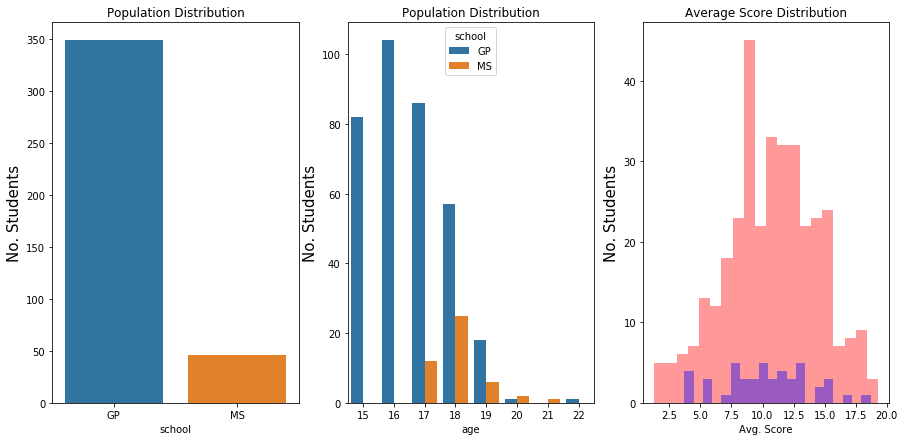

In [10]:
#Create DataFrame with only records from the school GP
dfGP=df[df.school == 'GP']
#Create DataFrame with only records from the school MS
dfMS=df[df.school == 'MS']

fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(15,7), sharex=False) #Con sharex se comparte el mismo eje x
sns.countplot(x='school', data=df, ax=ax1).set_ylabel('No. Students', fontsize=15)
sns.countplot(x='age', data=df, hue='school',ax=ax2).set_ylabel('No. Students', fontsize=15)
sns.distplot(dfGP['Avg. Score'], kde=False, color='red', bins=20, label = 'GP', ax=ax3).set_ylabel('No. Students', fontsize=15)
sns.distplot(dfMS['Avg. Score'], kde=False, color='blue', bins=20, label = 'MS', ax=ax3)
ax1.title.set_text('Population Distribution')
ax2.title.set_text('Population Distribution')
ax3.title.set_text('Average Score Distribution')

# Hypothesis Evaluation

Hypothesis 1: There exists a direct corelation between the parent's education level and the academic performance of the student.

Text(0, 0.5, 'Average Final Score')

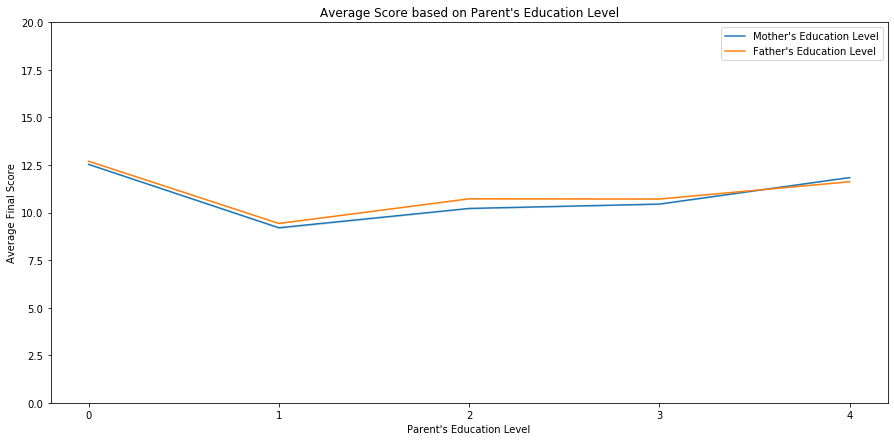

In [25]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Medu', y='Avg. Score', data=df, ci=False, label="Mother's Education Level")
sns.lineplot(x='Fedu', y='Avg. Score', data=df, ci=False, label="Father's Education Level")
plt.ylim([0,20])
plt.xticks([0,1,2,3,4])
plt.title("Average Score based on Parent's Education Level")
plt.xlabel("Parent's Education Level")
plt.ylabel('Average Final Score')

THERE IS NO CLEAR OR DIRECT CORRELATION. HYPOTHESIS IS INVALID

Variation of hypothesis 1: There's a direct correlation between the student's academic performance and the parent's type of job.

Text(0, 0.5, 'Average Final Score')

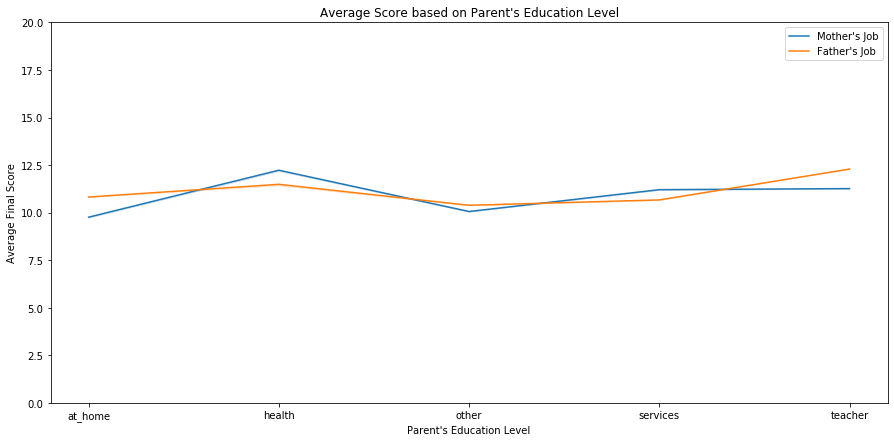

In [22]:
plt.figure(figsize=(15,7))
sns.lineplot(x='Mjob', y='Avg. Score', data=df, ci=False, label="Mother's Job")
sns.lineplot(x='Fjob', y='Avg. Score', data=df, ci=False, label="Father's Job")
plt.ylim([0,20])
plt.title("Average Score based on Parent's Education Level")
plt.xlabel("Parent's Education Level")
plt.ylabel('Average Final Score')

THERE IS NO CLEAR OR DIRECT CORRELATION. HYPOTHESIS IS INVALID

HYPOTHESIS 2: THERE IS A DIRECT CORRELATION BETWEEN THE STUDENT'S ACADEMIC PERFORMANCE AND THE AMOUNT OF STUDY-TIME.

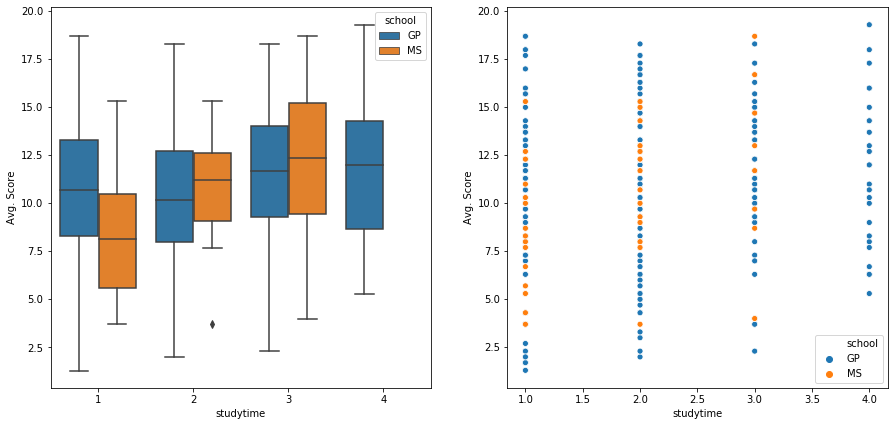

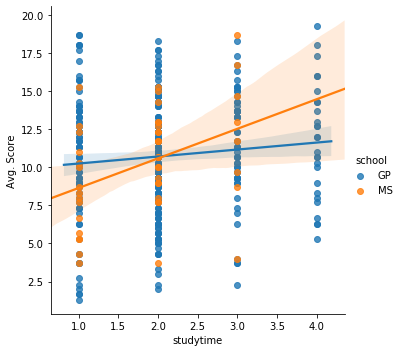

In [20]:
fig,(ax1,ax2) = plt.subplots(1,2, figsize=(15,7), sharex=False) #Con sharex se comparte el mismo eje x
sns.scatterplot(x='studytime', y='Avg. Score', data = df, hue='school', ax=ax2)
sns.boxplot(x='studytime', y='Avg. Score', data = df, hue='school',ax=ax1)

sns.lmplot(x='studytime', y='Avg. Score', data = df, hue='school')

INCONCLUSIVE: While there is no clear and direct correlation between the study time and the student's academic performance at GP, there is a slight correlation at the MS school.

HYPOTHESIS 3: THERE IS A DIRECT CORRELATION BETWEEN THE STUDENT'S ACADEMIC PERFORMANCE AND THEIR INTEREST IN ATTENDING UNIVERSITY

Text(0, 0.5, 'Avg. Score')

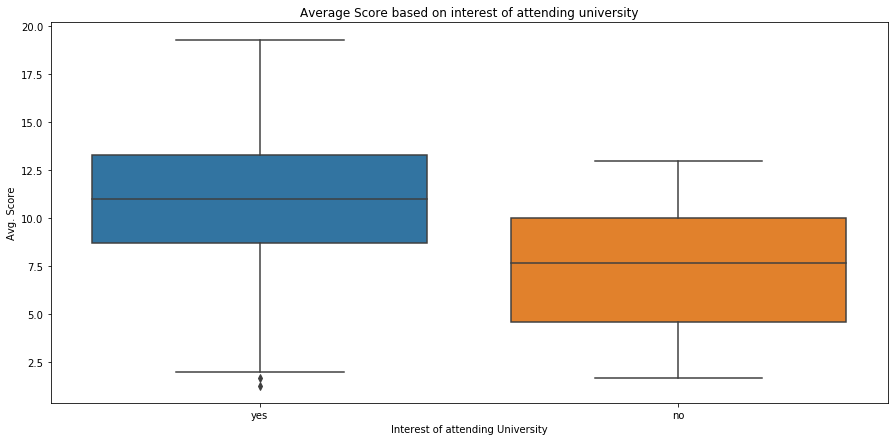

In [32]:
plt.figure(figsize=(15,7))
sns.boxplot(x='higher', y='Avg. Score', data=df)
plt.title('Average Score based on interest of attending university')
plt.xlabel('Interest of attending University')
plt.ylabel('Avg. Score')

In [36]:
df.pivot_table(index=['higher'], values = 'Avg. Score', aggfunc=[np.mean, min, max])

,mean,min,max
,Avg. Score,Avg. Score,Avg. Score
higher,,,
no,7.655000,1.7,13.0
yes,10.838667,1.3,19.3


Valid hypothesis. Student's which have an interest in attending university had a slightly higher average final score than those who do not have such interest. While the median and the average is higher, the spread is also higher, meaning that while some students have indicated an interest in attending University, not all have taken the necessary steps to reach said goal (as seen by their low results.

In [38]:
df.pivot_table(index=['higher','school'], values = 'Avg. Score', aggfunc=[np.mean, min, max])

mean        min        max
              Avg. Score Avg. Score Avg. Score
higher school                                 
no     GP       7.082353        1.7       13.0
       MS      10.900000        7.7       12.7
yes    GP      10.921386        1.3       19.3
       MS      10.200000        3.7       18.7

Text(0, 0.5, 'Avg. Score')

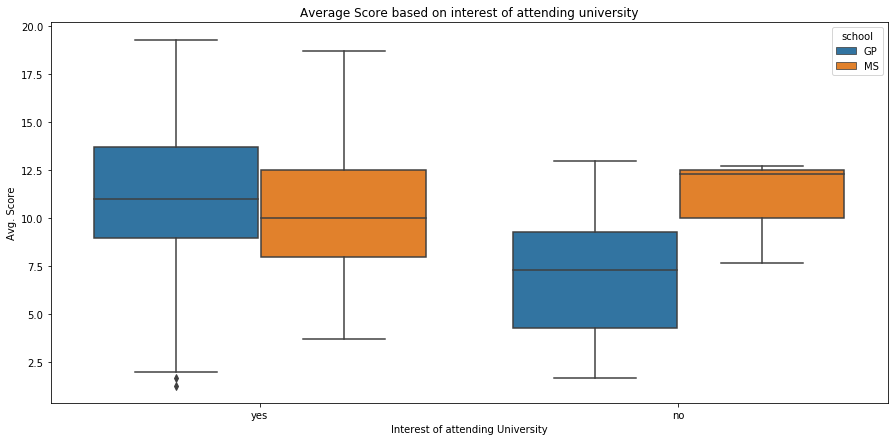

In [33]:
plt.figure(figsize=(15,7))
sns.boxplot(x='higher', y='Avg. Score', data=df, hue='school')
plt.title('Average Score based on interest of attending university')
plt.xlabel('Interest of attending University')
plt.ylabel('Avg. Score')

Overall there seems to be a direct correlation, however, when viewed on a per school basis the situation changes. In the MS school, there seems to be no correlation between the interst in attending university and a higher final score. Those that did not intend on attending university had a higher average than those that did.

# Other Analysis

Academic Performance vs Alcohol Consumption

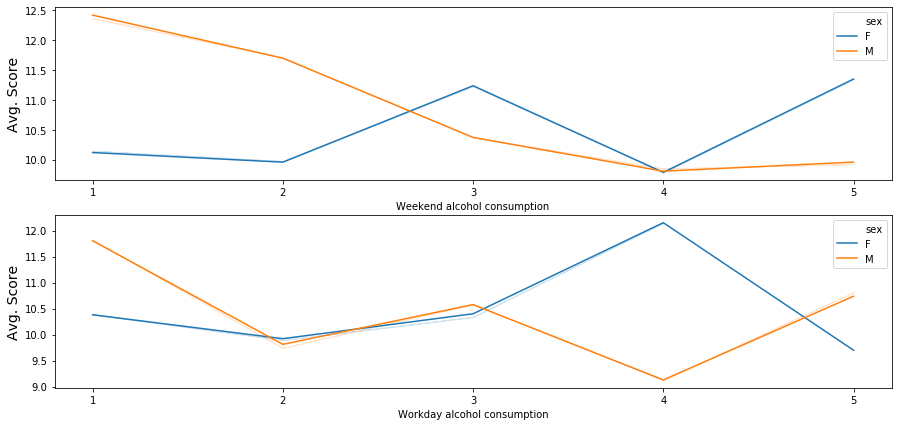

In [61]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(15,7), sharex=False) #Con sharex se comparte el mismo eje x
sns.lineplot(x='Dalc', y='Avg. Score', data = df, hue='sex', ci=False, ax=ax2).set_ylabel('Avg. Score', fontsize=14)
sns.lineplot(x='Walc', y='Avg. Score', data = df, hue='sex',ci=False, ax=ax1).set_ylabel('Avg. Score', fontsize=14)
ax1.set_xlabel('Weekend alcohol consumption')
ax2.set_xlabel('Workday alcohol consumption')
ax1.set_xticks([1,2,3,4,5])
ax2.set_xticks([1,2,3,4,5])

Alcohol Consumption by age

Text(0.5, 0, 'Age')

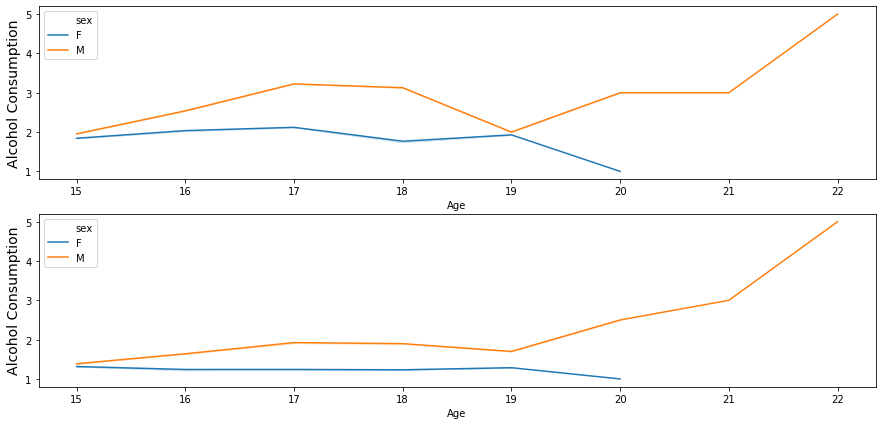

In [68]:
fig,(ax1,ax2) = plt.subplots(2,1, figsize=(15,7), sharex=False) #Con sharex se comparte el mismo eje x
sns.lineplot(x='age', y='Dalc', data = df, hue='sex', ci=False, ax=ax2).set_ylabel('Alcohol Consumption', fontsize=14)
sns.lineplot(x='age', y='Walc', data = df, hue='sex',ci=False, ax=ax1).set_ylabel('Alcohol Consumption', fontsize=14)
ax1.set_xlabel('Age')
ax2.set_xlabel('Age')

Academic Performance based on commute time

Text(0, 0.5, 'Travel Time Category')

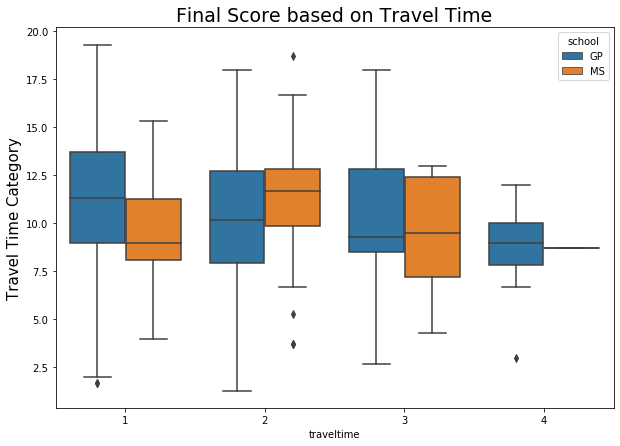

In [76]:
plt.figure(figsize=(10,7))
sns.boxplot(x='traveltime', y='Avg. Score', data=df, hue='school')
plt.title('Final Score based on Travel Time', fontsize=19)
plt.ylabel('Final Score', fontsize=15)
plt.ylabel('Travel Time Category', fontsize=15)
